In [24]:
import numpy as np
import scipy as sp
import math
import random
import matplotlib.pyplot as plt


In [5]:
#----1D input ------#
def oned(a):
    print("simulating a visual neuron's temporal response") 
    k = 25;  #Temporal scale factor 
    n = 5
    t = np.linspace(0,1,50)
    slow_t=np.power((k*t),n) * np.exp(-k*t)*(1/sp.math.factorial(n)-np.power((k*t),2)/sp.math.factorial(n+2))
    n = 3
    fast_t=np.power((k*t),n) * np.exp(-k*t)*(1/sp.math.factorial(n)-np.power((k*t),2)/sp.math.factorial(n+2))
    b = slow_t + fast_t # linear filter
    c = np.convolve(b,a) # convolve filter with stimulus
    d = c/np.max(c) # normalize
    e=100./(1.0 + np.exp(10*(0.5-d))) # static nonlinearity
    r=e; #for continuous output
    
    return(r)



In [41]:
# one_dimensional = []
# for i in range(1000):
#     one_dimensional.append(random.random()*random.randrange(-1,1))
one_dimensional = np.random.uniform(-1,1,1000)    

In [42]:
one_dimensional = np.array(one_dimensional)

In [43]:
one_result = oned(one_dimensional)

simulating a visual neuron's temporal response


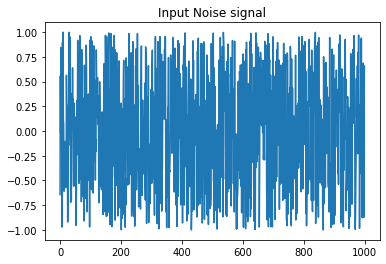

In [44]:
plt.title('Input Noise signal')
plt.plot(one_dimensional)

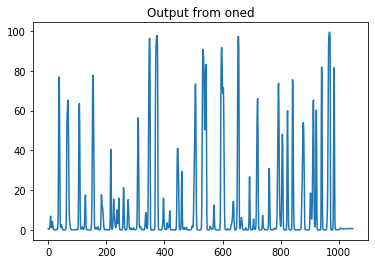

In [45]:
plt.title('Output from oned')
plt.plot(one_result)

In [46]:
one_correlation = np.correlate(one_dimensional, one_result)

In [47]:
one_correlation.shape

(50,)

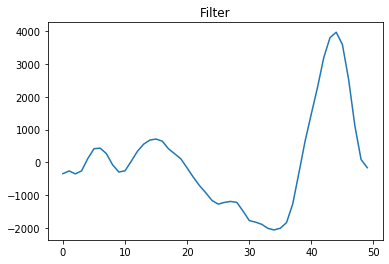

In [48]:
plt.title('Filter')
plt.plot(one_correlation)

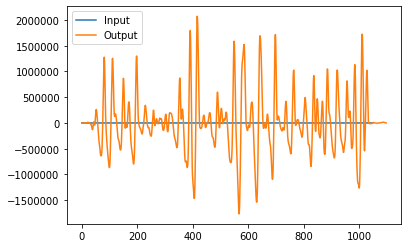

In [52]:
plt.plot(one_result, label='Input')
plt.plot(np.convolve(one_correlation, one_result), label='Output')
plt.legend()

In [ ]:
#---- 3D input ------#
def threed(a):
    print("simulating a V1 simple cell's spatiotemporal response") 
    siz=a.shape
    x=siz[0]
    y=siz[1]
    z=siz[2]
    SIZE=x
    SF=0.15
    SIG=7
    OR=90*math.pi/180
    AR=3
    PH=0
    k=25;  #Temporal scale factor 
    n=5
    t = np.linspace(0,1,50)
    slow_t=np.power((k*t),n) * np.exp(-k*t)*(1/sp.math.factorial(n)-np.power((k*t),2)/sp.math.factorial(n+2))
    n = 3
    fast_t=np.power((k*t),n) * np.exp(-k*t)*(1/sp.math.factorial(n)-np.power((k*t),2)/sp.math.factorial(n+2))
    b = slow_t + fast_t # linear filter
    xx = np.linspace(1, SIZE, SIZE)
    xdata,ydata=np.meshgrid(xx,xx)
    temp1=(xdata-SIZE/2)*math.cos(OR)+(np.matrix.transpose(xdata)-SIZE/2)*np.sin(OR)
    temp2=(-xdata+SIZE/2)*math.sin(OR)+(np.matrix.transpose(xdata)-SIZE/2)*np.cos(OR)
    f1 = np.exp(-(np.multiply(temp1,temp1) + AR*AR*np.multiply(temp2,temp2)) / (2*SIG*SIG))
    f2 = np.cos(2*np.pi*SF*temp2+PH)
    rf_image = np.multiply(f1,f2)
    rf_image = rf_image - np.mean(rf_image)
    dp=[0]*(z)
    for ii in range (0,z-1,1):
        dp[ii]=np.sum(np.multiply(a[:,:,ii],rf_image))
    c=np.convolve(b,dp) # convolve filter with stimulus
    c=c/np.max(c) # normalize
    c[np.where(c<0)]=0
    r=c
    r[np.where(r>0.4)]=1 #spiking binary output
    r[np.where(r<=0.4)]=0
    return(r)

